### Importation des librairies

In [ ]:
!python -m pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import scipy

### Importation des données

In [39]:
tft_set_number = 11
df_champions = pd.read_csv(f'app/data/champions-{tft_set_number}.csv', header=0, index_col=0)
df_champions[['Health_1star', 'Health_2star', 'Health_3star']] = df_champions['Health'].str.split('/', expand=True).astype('int64')
df_champions[['DPS_1star', 'DPS_2star', 'DPS_3star']] = df_champions['DPS'].str.split('/', expand=True).astype('int64')
df_champions[['Damage_1star', 'Damage_2star', 'Damage_3star']] = df_champions['Damage'].str.split('/', expand=True).astype('int64')
df_champions['Mana'] = df_champions['Mana'].apply(lambda x:  x if '/' in x else f'0/{x}')
df_champions[['ManaStart', 'ManaCast']] = df_champions['Mana'].str.split('/', expand=True).astype('int64')
df_champions['ManaStart'] = df_champions['ManaStart'].replace('', 0)
df_champions = df_champions.drop(columns=['Health', 'Mana', 'Ability Power', 'DPS', 'Damage', 'Crit Rate'])
# Pour l'instant sans les classes et origines
df_champions = df_champions.drop(columns=['Classes', 'Origins'])
df_champions

,Cost,Armor,MR,Atk Spd,Range,Health_1star,Health_2star,Health_3star,DPS_1star,DPS_2star,DPS_3star,Damage_1star,Damage_2star,Damage_3star,ManaStart,ManaCast
Name,,,,,,,,,,,,,,,,
Aatrox,2,45,45,0.65,1,700,1260,2268,36,64,116,55,99,178,40,90
Ahri,1,15,15,0.70,4,500,900,1620,21,38,68,30,54,97,0,60
Alune,3,25,25,0.70,4,650,1170,2106,28,50,91,40,72,130,20,60
Amumu,3,50,50,0.60,1,900,1620,2916,36,65,117,60,108,194,60,110
Annie,4,60,60,0.65,1,850,1530,2754,42,76,137,65,117,211,70,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,1,45,45,0.75,1,600,1080,1944,30,54,97,40,72,130,0,80
Yone,3,40,40,0.80,1,800,1440,2592,52,94,168,65,117,211,10,70
Yorick,2,45,45,0.60,1,800,1440,2592,36,65,117,60,108,194,40,90


array([[<Axes: xlabel='Cost', ylabel='Cost'>,
        <Axes: xlabel='Armor', ylabel='Cost'>,
        <Axes: xlabel='MR', ylabel='Cost'>,
        <Axes: xlabel='Atk Spd', ylabel='Cost'>,
        <Axes: xlabel='Range', ylabel='Cost'>,
        <Axes: xlabel='Health_1star', ylabel='Cost'>,
        <Axes: xlabel='Health_2star', ylabel='Cost'>,
        <Axes: xlabel='Health_3star', ylabel='Cost'>,
        <Axes: xlabel='DPS_1star', ylabel='Cost'>,
        <Axes: xlabel='DPS_2star', ylabel='Cost'>,
        <Axes: xlabel='DPS_3star', ylabel='Cost'>,
        <Axes: xlabel='Damage_1star', ylabel='Cost'>,
        <Axes: xlabel='Damage_2star', ylabel='Cost'>,
        <Axes: xlabel='Damage_3star', ylabel='Cost'>,
        <Axes: xlabel='ManaStart', ylabel='Cost'>,
        <Axes: xlabel='ManaCast', ylabel='Cost'>],
       [<Axes: xlabel='Cost', ylabel='Armor'>,
        <Axes: xlabel='Armor', ylabel='Armor'>,
        <Axes: xlabel='MR', ylabel='Armor'>,
        <Axes: xlabel='Atk Spd', ylabel='Armor'>

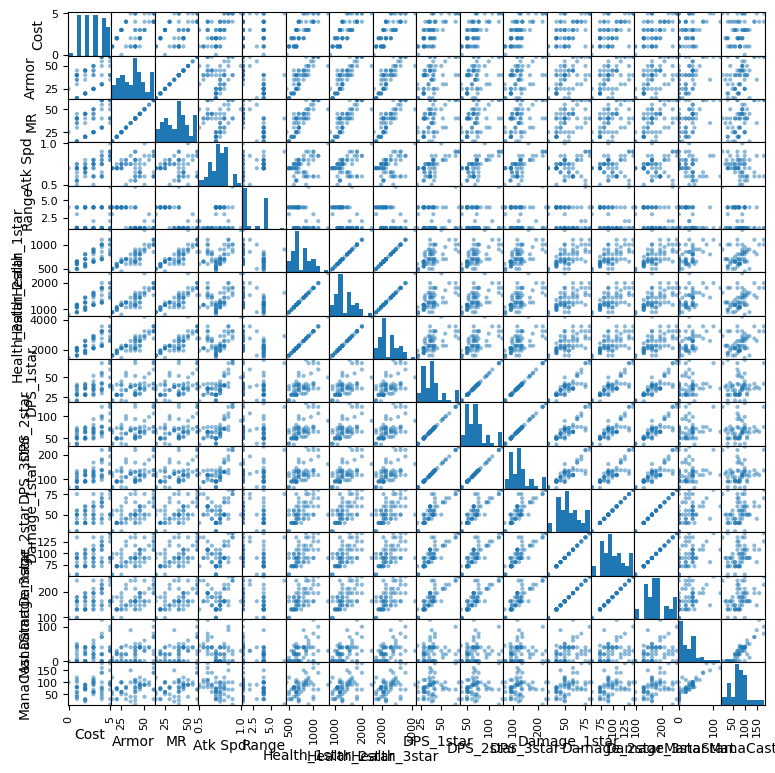

In [40]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(df_champions,figsize=(9,9))


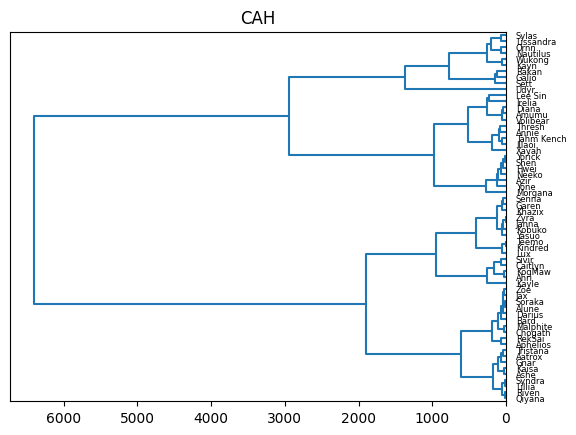

In [41]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens

Z = linkage(df_champions,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=df_champions.index,orientation='left',color_threshold=0)
plt.show()


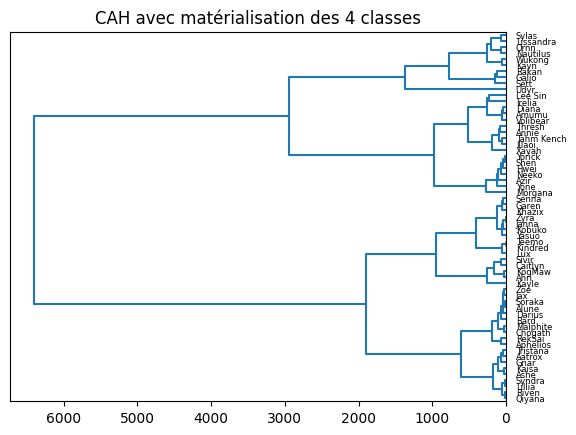

NameError: name 'fcluster' is not defined

In [42]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=df_champions.index,orientation='left',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))
